<a href="https://colab.research.google.com/github/chasemoses/CSE450-JupyiterNotebook/blob/main/Chase_PopQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns

rasins = pd.read_csv("raisin-training.csv")

rasins.head(30)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,97026,455.971591,273.053810,0.800869,99561,0.671205,1212.667,Kecimen
1,65253,418.997887,205.756185,0.871122,69700,0.666255,1075.404,Besni
2,113029,558.516156,265.284203,0.879996,116783,0.662092,1419.577,Besni
3,76792,338.857545,291.359202,0.510584,78842,0.772322,1042.770,Kecimen
4,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,Kecimen
5,47253,360.019176,172.508389,0.877725,51538,0.711320,940.542,Besni
6,105192,440.562909,305.791779,0.719885,107313,0.736902,1244.054,Besni
7,110616,461.144553,306.899065,0.746384,112150,0.752398,1252.875,Kecimen
8,53633,313.479956,218.668617,0.716534,55147,0.728432,882.669,Kecimen
9,70196,373.197647,243.881105,0.756935,71937,0.690790,1024.256,Kecimen


In [12]:
# Any null values?
rasins.isnull().values.any()

False

In [25]:
# How many total are we working with? Might help determine splits.
rasins['Class'].count()

698

In [22]:
rasins['Area'].groupby(rasins['Class']).value_counts()

Class    Area  
Besni    40702     1
         45051     1
         47253     1
         48007     1
         48488     1
                  ..
Kecimen  110616    1
         111450    1
         114648    1
         136340    1
         180898    1
Name: Area, Length: 698, dtype: int64

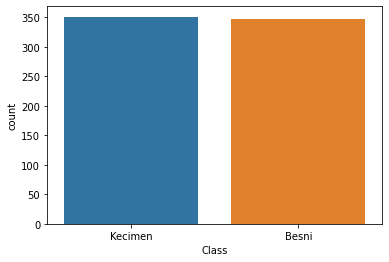

In [26]:
# How many of each are we working with? Is it imbalanced?
sns.countplot(data=rasins, x='Class')

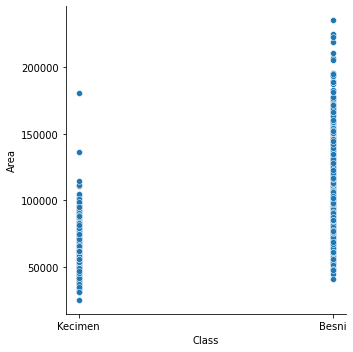

In [10]:
# Trying to figure out relationships between class and the different features


sns.relplot(data=rasins, x='Class', y='Area')

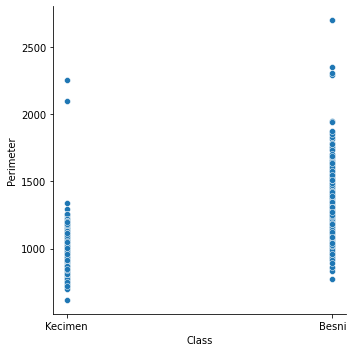

In [11]:
sns.relplot(data=rasins, x='Class', y='Perimeter')

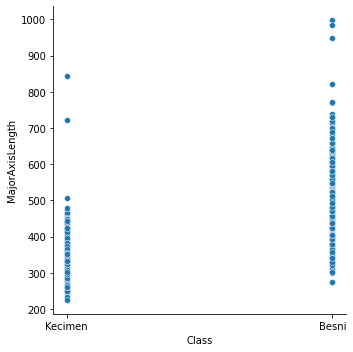

In [13]:
sns.relplot(data=rasins, x='Class', y='MajorAxisLength')

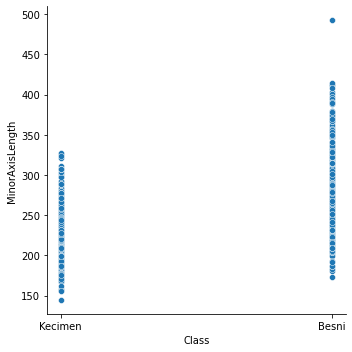

In [14]:
sns.relplot(data=rasins, x='Class', y='MinorAxisLength')

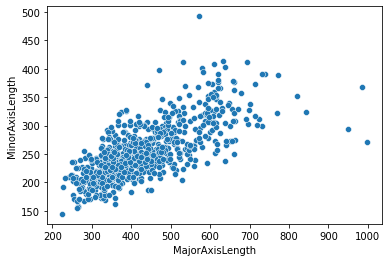

In [65]:
sns.scatterplot(data=rasins, x='MajorAxisLength', y='MinorAxisLength')

In [98]:
features = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", 'Eccentricity', 'ConvexArea', 'Extent']
X = rasins[features]

y = rasins['Class']

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

In [100]:
# Not all the data are in the same ranges. Look to Normalize that.
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)

X_train = norm.transform(X_train)

X_test = norm.transform(X_test)

In [101]:
# Use K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

In [102]:

model.fit(X_train, y_train)

KNeighborsClassifier()

In [103]:
y_prediction = model.predict(X_test)

y_prediction

array(['Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen'], dtype=object)

In [104]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_prediction, y_test)

0.9

In [120]:
comparedf = pd.DataFrame()

comparedf['predicted'] = y_prediction
comparedf['actual'] = np.array(y_test)

comparedf.head(40)

,index,predicted,actual
0,0,Besni,Besni
1,1,Kecimen,Kecimen
2,2,Kecimen,Kecimen
3,3,Besni,Besni
4,4,Besni,Besni
5,5,Kecimen,Besni
6,6,Kecimen,Kecimen
7,7,Kecimen,Kecimen
8,8,Kecimen,Kecimen
9,9,Besni,Besni


In [133]:
# Get Holdout set
rasin_holdout = pd.read_csv("raisin-holdout.csv")

In [136]:
# Pre Processing (Normalization)

norm = MinMaxScaler().fit(rasin_holdout)

rasin_holdout = norm.transform(rasin_holdout)



In [145]:
# Get predictions

holdout_predictions = model.predict(rasin_holdout)

holdout_predictions

final_holdout = pd.DataFrame()

final_holdout['Class'] = holdout_predictions
final_holdout


,Class
0,Besni
1,Besni
2,Besni
3,Besni
4,Besni
...,...
197,Besni
198,Besni
199,Besni
200,Besni


In [146]:
from pathlib import Path  
filepath = Path('Main/final-holdout-predictions.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_holdout.to_csv(filepath)